<a href="https://colab.research.google.com/github/mat-mot/Social-Network-Analysis/blob/main/SNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Basic Libraries**
Here we import the basic libraries, although in the process of project implementation, running the infrastructure, and after
installing the main prerequisites or wherever necessary, we will import other necessary libraries in the required section.
Since, several system environment variables need to be defined for the programs to work correctly, we use the os library. Python
OS module provides the facility to establish the interaction between the user and the operating system. It offers many useful OS
functions that are used to perform OS-based tasks and get related information about operating system. The Python OS module
lets us work with the files and directories.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")
import os
import json
import csv
import re
from datetime import date, datetime, timezone
# miscellaneous
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# **Java (JDK)**
The Java JDK is essential to correctly run Java applications on various platforms . The JDK also supports the OpenJDK community,
which is an open source project that develops and maintains the Java SE. After installing Java (JDK), we need to define JAVA_HOME
variable for Java Virtual Machine (JVM).

In [ ]:
def install_java():
  import os
  # install java, it is not needed if installed
  !apt-get install openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# **Config info**

In [ ]:
# Spark config
spark_session_appname = "StreamDataAnalysis"
# Kafka config
kafka_topic_name = "data-stream"
kafka_bootstrap_servers = "******************************:9092"
# Elasticsearch credentials
elastic_credential = {}
elastic_credential["server_host"] = "http://******************************"
elastic_credential["server_port"] = "9200"
elastic_credential["username"] = "******************************"
elastic_credential["password"] = "******************************"
elastic_credential["cloud_id"] = "******************************"

# **Apache Spark**
Apache Spark is a multi-language engine for data engineering, data science, and machine learning on single-node machines or
clusters. It was originally developed at the University of California, Berkeley and later donated to the Apache Software Foundation.
It can process data in batches or real-time streams, execute fast SQL queries, train machine learning algorithms, and integrate with
various frameworks and storage systems. It is based on the concept of resilient distributed datasets (RDDs), which are fault-tolerant
collections of data items distributed over a cluster of machines. Spark manages the workflow as a directed acyclic graph (DAG) of
operations on RDDs.

In [ ]:
def install_pyspark():
  # install package related to Spark
  !pip install -q pyspark

def init_pyspark(appname = None):
  # import Apache Spark or PySpark packages
  from pyspark import SparkContext, SQLContext
  from pyspark.sql import SparkSession
  #import findspark
  #findspark.init()
  #findspark.find()
  # building a spark session
  #sc = SparkContext()
  #spark = SQLContext(sc)
  spark_session_appname = "StreamDataAnalysis"
  if appname != None:
    session_appname = appname
  # building a spark session
  spark = SparkSession.builder.master("local[*]").appName(session_appname).getOrCreate()
  # property used to format output tables better
  #spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
  # single cluster information
  print(spark)
  return spark


# **Apache Kafka**
Apache Kafka is a pub-sub (publish-subscribe) messaging service and a powerful queue that can manage a large amount of data
and allows you to send messages from one terminal to another. Kafka may be used to accept messages both offline and online. To
avoid data loss, Kafka messages are stored on a disc and replicated throughout the cluster. The Kafka messaging system is based
on the ZooKeeper synchronization service. For real-time streaming data processing, it works well with Apache Storm and Spark.
This data engineering project entails publishing the real-time streaming data into Kafka using the PublishKafka processor. Once the
data is stored in Kafka topic, it needs to be streamed into PySpark for further processing.

In [ ]:
def install_kafka():
  # download and install Apache Kafka
  !wget -q https://archive.apache.org/dist/kafka/3.4.0/kafka_2.13-3.4.0.tgz
  # unzip the kafka file to the current folder
  !tar -xvf kafka_2.13-3.4.0.tgz
  # rename for user-friendly and better readability
  !mv kafka_2.13-3.4.0 kafka
  !pip install kafka-python

def init_kafka(topicnames = None):
  topicnames = "data-stream"
  !./kafka/bin/zookeeper-server-start.sh -daemon ./kafka/config/zookeeper.properties
  !./kafka/bin/kafka-server-start.sh -daemon ./kafka/config/server.properties
  !echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
  !sleep 10
  !ps -ef | grep kafka
  # create the kafka topics with the following specs
  !./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic data-stream
  !./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 2 --topic data-stream2
  # get describing the topic for details on the configuration
  !./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic data-stream
  !./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic data-stream2

# **Apache Cassandra**
Apache Cassandra is a highly-scalable partitioned row store. Cassandra or Kassandra, in Greek mythology, the daughter of Priam,
the last king of Troy, and his wife Hecuba

In [ ]:
def install_cassandra():
  import os
  # download and install cassandra
  !wget -q https://archive.apache.org/dist/cassandra/4.0.9/apache-cassandra-4.0.9-bin.tar.gz
  # unzip the cassandra file to the current folder
  !tar -xzvf apache-cassandra-4.0.9-bin.tar.gz
  # rename for user-friendly and better readability
  !mv apache-cassandra-4.0.9 cassandra
  # set cassandra path to system path environment
  os.environ["CASSANDRA_HOME"] = "/content/cassandra"
  !pip install cassandra-driver

def init_cassandra():
  pass

def get_cassandra_auth():
  pass



# **Elasticsearch**
On top of the Apache Lucene search framework, Elasticsearch is an open-source search engine. It is flexible, scalable, and simple to
use. Elasticsearch may be used to swiftly and almost instantly store, search, and analyze enormous volumes of data.

In [ ]:
def install_elastic():
  import os
  # download and install Elasticsearch
  !wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-8.8.0-linux-x86_64.tar.gz
  # unzip the elasticsearch file to the current folder
  !tar -xzvf elasticsearch-8.8.0-linux-x86_64.tar.gz
  # rename for user-friendly and better readability
  !mv elasticsearch-8.8.0 elasticsearch
  # set elasticsearch path to system path environment
  os.environ["ES_HOME"] = "/content/elasticsearch"
  !pip install elasticsearch

def init_elastic():
  !sudo chown -R daemon:daemon ./elasticsearch/
  !sudo -H -u daemon elasticsearch/bin/elasticsearch
  !./elasticsearch/bin/elasticsearch -d
  !echo "Waiting a while until Elasticsearch services are up and running..."
  !sleep 30
  # if we get 1 root & 2 daemon process then Elasticsearch instance has started successfully
  !ps -ef | grep elasticsearch

def get_elasticsearch_auth(elasticsearch_api_credential = None):
  # import Elasticsearch packages/driver
  from elasticsearch import helpers, Elasticsearch
  elasticsearch_api_credential = elastic_credential
  # setup the Elasticsearch client using credentials
  server_host = elasticsearch_api_credential["server_host"]
  server_port = elasticsearch_api_credential["server_port"]
  username = elasticsearch_api_credential["username"]
  password = elasticsearch_api_credential["password"]
  cloud_id = elasticsearch_api_credential["cloud_id"]
  elastic_server = f"{server_host}:{server_port}"
  # create the Elasticsearch client instance
  elasticsearch = Elasticsearch(cloud_id = cloud_id, basic_auth=(username, password))
  try:
    return elasticsearch
    # successful response
    print(elasticsearch.info())
    # {'name': 'instance-0000000000', 'cluster_name': ...}
  except Exception as e:
    print("Error : " + str(e))
    exit(1)

# **Step 1: Fetch Data(Offline)**
loading data from csv file in google drive

In [ ]:
# mount Google Drive to access the dataset
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
dataset_name = 'dataset.csv'
data_seperator = ','
# file path on Google Drive
drive_file_path = f"/content/drive/My Drive/SNP/{dataset_name}"
# load data from csv to a dataframe.
install_pyspark()
spark = init_pyspark(spark_session_appname)
raw_offline_tweets_df = spark.read.csv(drive_file_path, sep= data_seperator, header = True, inferSchema = True)

NameError: name 'install_pyspark' is not defined

loading json data from files in colab

In [ ]:

dataset_name = 'dataset.json'
drivefilepath = f'/content/drive/My Drive/SNP/{dataset_name}'
json_tweet_line = []
with open(drivefilepath, 'r', encoding='utf-8-sig') as ds:
  json_tweet_line = json.load(ds)

def get_data_to_json_object():
  return json_tweet_line

def get_data_to_pd_df():
  return pd.json_normalize(json_tweet_line)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/SNP/dataset.json'

# **Data Preprocessing**
Before sending the data collected from online sources in the distributed communication channel, we select only the necessary
parts and send them in the message broker channel like Kafka. This makes system and network resources to be used optimally.
Therefore, we define a function that selects from the data model only the relevant fields that we announced earlier and ignores the
other fields of JSON Tweet

In [ ]:
def process_tweet(tweet, is_json = False):
  import json
  from datetime import date, datetime, timezone
  from geopy.geocoders import Nominatim
  raw_tweet = ""
  result = {}
  if is_json :
    raw_tweet = json.loads(tweet)
  else :
    raw_tweet = tweet
  """
  * id +
  * created_at +
  * text +
  * hashtags +
  * user_id +
  * user_name +
  * user_screen_name +
  * geo (lat, long)
  * like_count +
  * retweet_count +
  * lang +
  """
  #"extended_tweet" in rawtweet
  result["id"] = raw_tweet["id"]
  result["user_id"] = raw_tweet["user"]["id"]
  result["user_name"] = raw_tweet["user"]["screen_name"]
  result["user_display_name"] = raw_tweet["user"]["name"]
  if tweet["truncated"] == True and hasattr(raw_tweet, "extended_tweet"):
    result["text"] = raw_tweet["extended_tweet"]["full_text"]
    result["hashtags"] = [hashtag["text"] for hashtag in raw_tweet["extended_tweet"]["entities"]["hashtags"]]
    #if hasattr(raw_tweet, "retweeted_status"): #=> check if retweet
  else:
    result["text"] = raw_tweet["text"]
    result["hashtags"] = [hashtag["text"] for hashtag in raw_tweet["entities"]["hashtags"]]

  result["lat"] = 0
  result["long"] = 0
  result["location_name"] = raw_tweet["user"]["location"] #=> user location in profile
  #result["country"] = raw_tweet["place"]["country"] # tweet country in profile
  result["like_count"] = raw_tweet["favorite_count"] #=> like count
  result["retweet_count"] = raw_tweet["retweet_count"] #=> retweet count
  #result["reply_count"] = raw_tweet["reply_count"] #=> comment count
  result["lang"] = raw_tweet["lang"]
  # example tweet datetime: Mon Jul 17 07:34:07 +0000 2023
  # parse tweet date by "%a %b %d %H:%M:%S +0000 %Y" or "%a %b %d %H:%M:%S %z %Y"
  # then formate it to "%Y-%m-%d %H:%M:%S", output: 2023-07-17 07:34:07
  result["created_at"] = datetime.strptime(raw_tweet["created_at"],"%a %b %d %H:%M:%S %z %Y").strftime("%Y-%m-%d %H:%M:%S")
  response = json.dumps(result, ensure_ascii = False)
  return response

In [ ]:
strr = ''
for a in get_data_to_json_object()[0].keys():
  strr += a + '\n'
print(strr)
print(get_data_to_json_object()[0]['total_tweets'])
count = 0
for tweet in get_data_to_json_object():
  if tweet['quotes'] == 0:
    count += 1
print(count)

pddata = get_data_to_pd_df()
sortcols = pddata[['tweet_id', 'username','fullname','text',
'timestamp',
'in_reply_to',
'replies',
# 'retweets',
# 'quotes',
'likes',
'tweet_links',
'tweet_hashtags',
'tweet_mentions',
'url',
# 'tweet_avatar',
# 'images',
# 'query'
]]
# print(process_tweet(get_data_to_json_object(), False))

In [ ]:
sortcols

,tweet_id,username,fullname,text,timestamp,in_reply_to,replies,likes,tweet_links,tweet_hashtags,tweet_mentions,url
0,1747887339903574082,@WIONews,WION,Did China hide #COVID19 details from the world...,2024-01-18 07:43:00+00:00,[],0,0,[http://wionews.com/videos],[#COVID19],[ShivanChanana],https://twitter.com/WIONews/status/17478873399...
1,1747887168045945134,@Kotsobar,Konstantinos covid19,Η γυναίκα για πρώτη φορά κάνει ζωάρα!!!! Βλέπω...,2024-01-18 07:42:00+00:00,[@2Cowman57],0,0,[],[],[],https://twitter.com/Kotsobar/status/1747887168...
2,1747887052937449858,@Kayden_Pub,МС,Я и первый не смотрела.,2024-01-18 07:42:00+00:00,[@Covid19______],0,0,[],[],[],https://twitter.com/Kayden_Pub/status/17478870...
3,1747887018963517645,@profilersystem,@profiler,They will do everything in their power to stop...,2024-01-18 07:41:00+00:00,[],1,0,[],"[#Trump, #NikkiHaley2024, #Republican, #COVID1...",[],https://twitter.com/profilersystem/status/1747...
4,1747886832937758775,@asifras362,Asif Rashid,India Logs 305 New Covid-19 Cases\n#COVID19 #I...,2024-01-18 07:41:00+00:00,[],0,1,[],"[#COVID19, #India]",[],https://twitter.com/asifras362/status/17478868...
...,...,...,...,...,...,...,...,...,...,...,...,...
1531,1747794459658469442,@CarloMontalvan,Carlos Montalván,Eis o problema que até agora as principais lid...,2024-01-18 01:34:00+00:00,"[@opropriofaka, @gcamarotti]",0,0,[],[],[],https://twitter.com/CarloMontalvan/status/1747...
1532,1747794280616448424,@Eddie27Evans,Eddie Haywood,Reality is not as interesting to some people...🙄,2024-01-18 01:33:00+00:00,"[@BathroomReports, @COVID19_disease]",1,3,[],[],[],https://twitter.com/Eddie27Evans/status/174779...
1533,1747794261033341003,@oobaka2024,野獣の理性,SARS‐CoV-2（COVID19）もそうでしたが、それらが議論された後\n「コロナパンデ...,2024-01-18 01:33:00+00:00,[],0,0,[],[],[],https://twitter.com/oobaka2024/status/17477942...
1534,1747794019814383708,@bemneto31,Pensamento,"Catarrada na cara ,baforada 2024, #covid19 tur...",2024-01-18 01:32:00+00:00,[],0,0,[],[#covid19],[],https://twitter.com/bemneto31/status/174779401...


# **Step 2: calculate degree centrality of network graph**

The code creates a graph using the NetworkX library in Python. The graph is created from a JSON object that is generated using the `get_data_to_json_object()` function. The JSON object contains information about users and their replies.

The graph is created by first initializing an empty JSON object with the required fields. The `user_id_name` dictionary is then created to store the usernames of the users in the graph. The `search()` function is used to check if a username already exists in the dictionary. If not, the username is added to the dictionary.

The `count` variable is used to keep track of the number of nodes in the graph. The `dt` variable is used to store the JSON object returned by `get_data_to_json_object()`. The `for` loop is used to iterate over the JSON object and add the nodes to the graph.

The `nodelist` variable is used to store the nodes in the graph. The `for` loop is used to iterate over the `user_id_name` dictionary and add the nodes to the `nodelist`.

The `edgelist` variable is used to store the edges in the graph. The `for` loop is used to iterate over the JSON object and add the edges to the `edgelist`.

Finally, the graph is created using the `node_link_graph()` function of NetworkX. The degree centrality of the graph is then calculated using the `degree_centrality()` function.


In [ ]:
graph_json = {
    "directed": False,
    "multigraph": False,
    "graph": {},
    "nodes": [
    ],
    "links": [
    ]
}

user_id_name = {}
dt = get_data_to_json_object()


def search(dic, searchFor):
    for v in dic.values():
        if searchFor == v:
            return True
    return False

def getkey(dic, searchFor):
    for k in dic:
        if searchFor == dic.get(k):
            return k
    return None

count = len(user_id_name)
for tmp in dt:
  if not search(user_id_name, tmp['username']):
    user_id_name[count] = tmp['username']
    count += 1
for tmp in dt:
  for tp in tmp['in_reply_to']:
    if not search(user_id_name, tp):
      user_id_name[count] = tp
      count += 1

nodelist = []

for key in user_id_name:
  nodelist.append({'id': key, 'label': user_id_name.get(key)})

edgelist = []

for tmp in dt:
  for tp in tmp['in_reply_to']:
    edgelist.append({"source": getkey(user_id_name, tmp['username']), "target": getkey(user_id_name, tp)})

graph_json['nodes'] = nodelist
graph_json['links'] = edgelist


graph = nx.node_link_graph(graph_json)

degree_centrality = nx.degree_centrality(graph)


In [ ]:


def save_to_csv(graph):
    df = pd.DataFrame(graph.edges, columns=['source', 'target'])
    df.to_csv('edges.csv', index=False)
    df = pd.DataFrame(graph.nodes, columns=['id'])
    df.to_csv('nodes.csv', index=False)


save_to_csv(graph)

# **output a json of graph**

In [ ]:
graph_json

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0, 'label': '@WIONews'},
  {'id': 1, 'label': '@Kotsobar'},
  {'id': 2, 'label': '@Kayden_Pub'},
  {'id': 3, 'label': '@profilersystem'},
  {'id': 4, 'label': '@asifras362'},
  {'id': 5, 'label': '@BagaiDr'},
  {'id': 6, 'label': '@Ticinonline'},
  {'id': 7, 'label': '@PollRackham'},
  {'id': 8, 'label': '@DrCappa'},
  {'id': 9, 'label': '@BathroomReports'},
  {'id': 10, 'label': '@smallblue11'},
  {'id': 11, 'label': '@realityspks'},
  {'id': 12, 'label': '@MahaHealthIEC'},
  {'id': 13, 'label': '@BlueRepublik'},
  {'id': 14, 'label': '@seanrcallaghan'},
  {'id': 15, 'label': '@PocketSamson'},
  {'id': 16, 'label': '@MamaPatriot6'},
  {'id': 17, 'label': '@Chinavirus_2020'},
  {'id': 18, 'label': '@kypioskreas'},
  {'id': 19, 'label': '@MBrandLA'},
  {'id': 20, 'label': '@timmy_gusto'},
  {'id': 21, 'label': '@Kathlee62660615'},
  {'id': 22, 'label': '@DepravedAngel'},
  {'id': 23, 'label': '@TEXASMOJOWOLF'},
  

**output the num of node and link in graph**

In [ ]:
print(graph)

Graph with 2291 nodes and 1383 edges


# **output degree centrality of graph**

Based on centrality, introduce 5 top nodes

In [ ]:
top5centrality = sorted(degree_centrality.items(), key=lambda x:x[1])
top5centrality[len(top5centrality)-5:len(top5centrality)]


[(1269, 0.00960698689956332),
 (55, 0.010917030567685589),
 (106, 0.014410480349344978),
 (390, 0.017903930131004366),
 (132, 0.026200873362445417)]

# **output importance of graph**

In [ ]:

top5importance = sorted(dict(graph.degree()).items(), key=lambda x:x[1])
top5importance[len(top5importance)-5:len(top5importance)]


[(1269, 22), (55, 25), (106, 33), (390, 41), (132, 60)]

# **Graph Schema**

in following part we show a grap schema

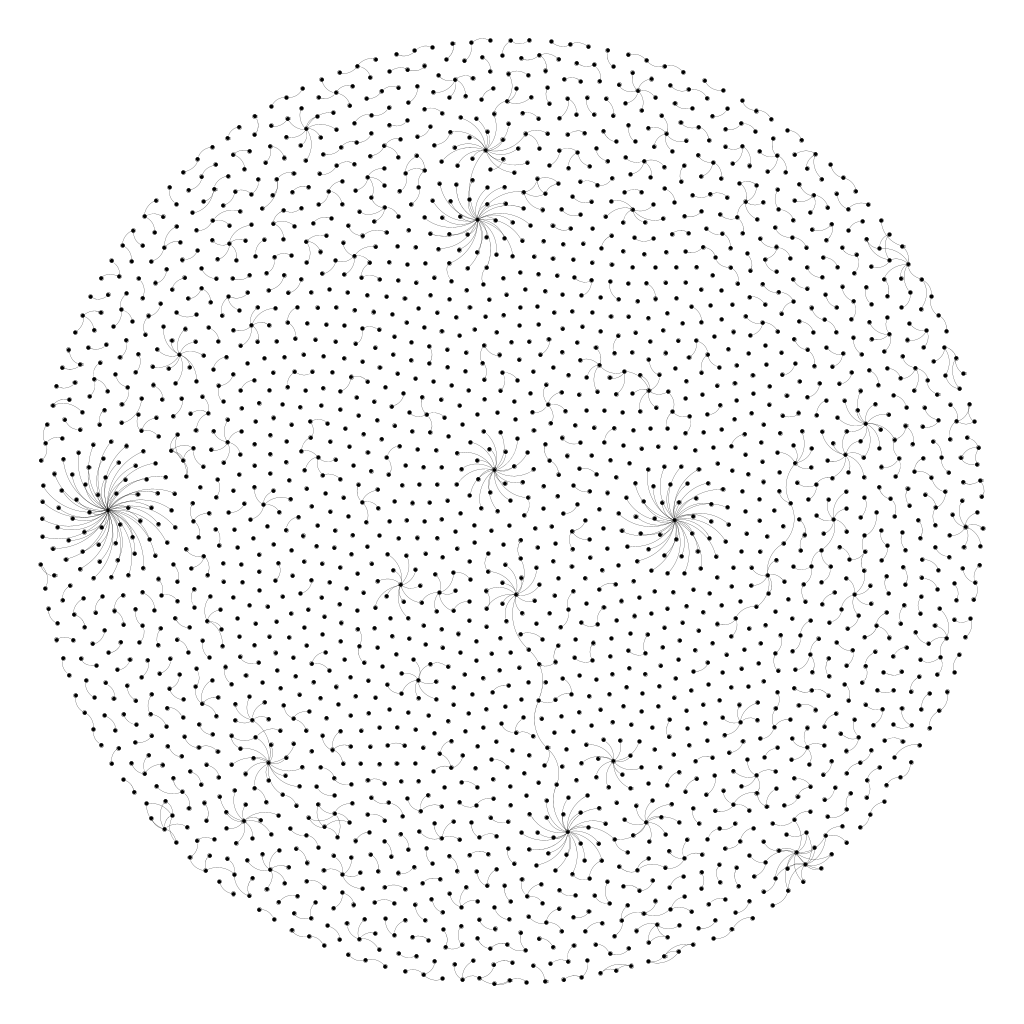